<a href="https://colab.research.google.com/github/anupa-aa/DeepLearning.AI-Courses/blob/master/Tensorflow_Developer_Certificate/Course_2/Week_1/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using more sophisticated images with Convolutional Neural Networks

## Load the data

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-08-04 15:57:22--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  18.6MB/s    in 4.3s    

2023-08-04 15:57:27 (15.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

# Unzipping
local_zip = "./cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall()

zip_ref.close()

# Contents are now in directory ./cats_and_dogs_filtered which contain
# "training" and "evaluation" subdirectories which each contain "cats"
# and "dogs" subdirectories

In [3]:
import os

base_dir = "cats_and_dogs_filtered"

print(f"Contents of base directory  : {os.listdir(base_dir)}")
print(f"Contents of train directory : {os.listdir( f'{base_dir}/train' )}")
print(f"Contents of validation directory : {os.listdir(f'{base_dir}/validation')}")


Contents of base directory  : ['train', 'validation', 'vectorize.py']
Contents of train directory : ['cats', 'dogs']
Contents of validation directory : ['cats', 'dogs']


In [4]:
# We now assign these file paths to variables for use later

# Training and validation directories
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Cats and dogs subdirectories for each
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

# Now get the filenames for each cats and dogs sample used in the training set
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

## Peeking at our data

In [5]:
# Find the total number of cats and dogs images in both training and validation

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [6]:
### Configuring matplotlib

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

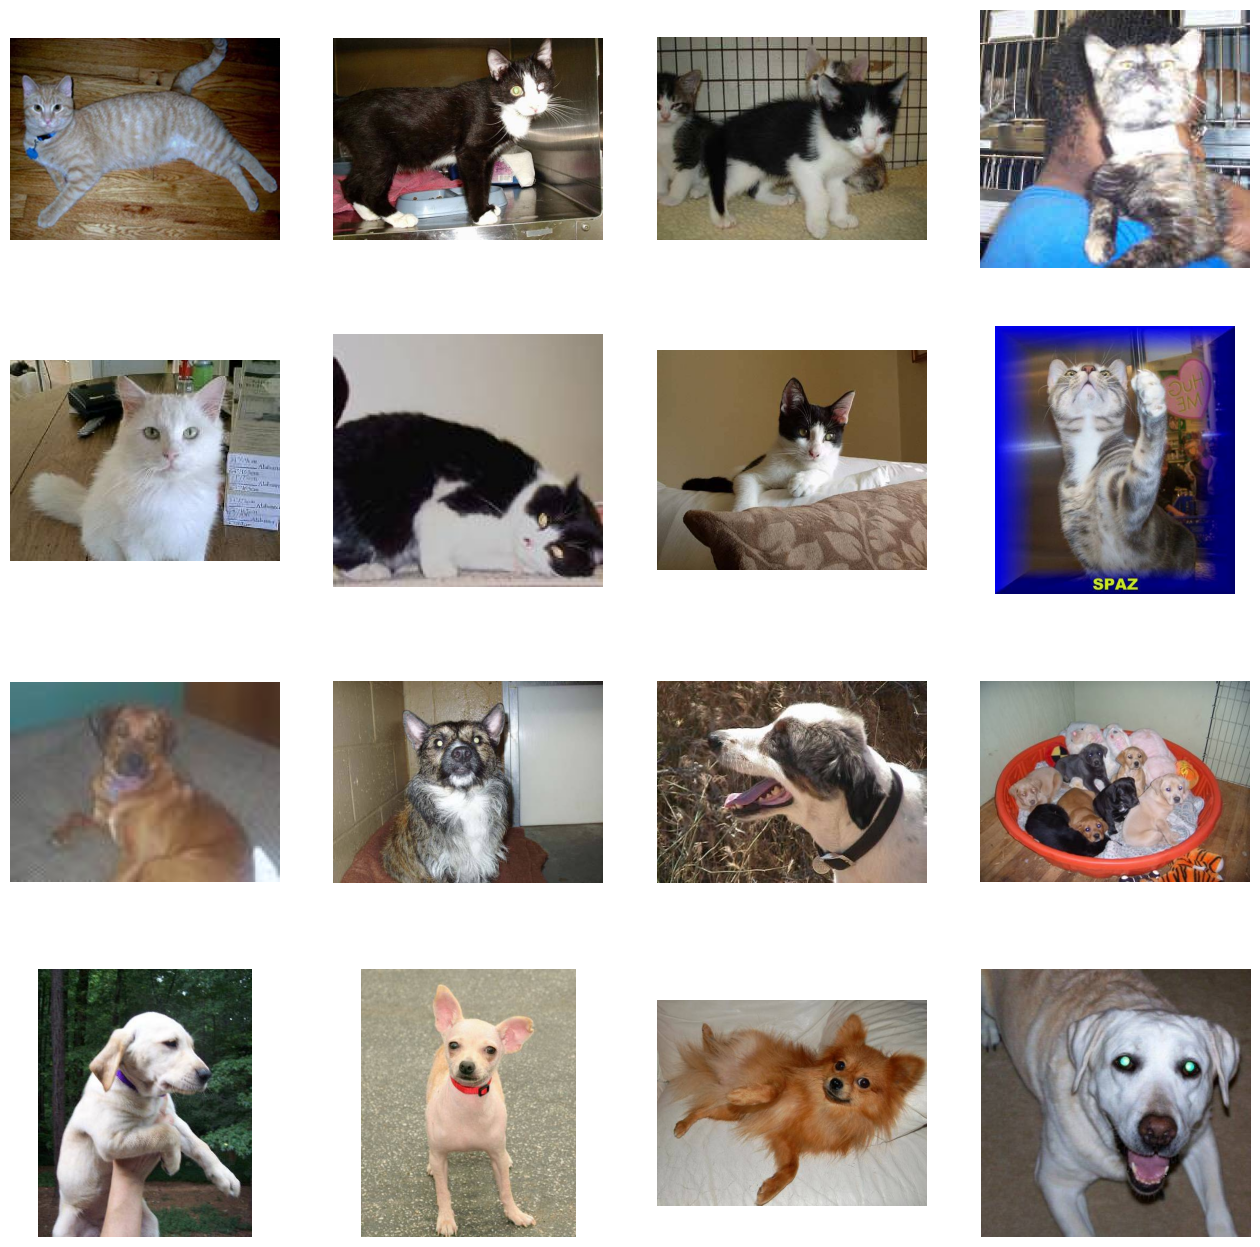

In [7]:
### Display a batch of 8 cats and 8 dogs randomly

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Data Pre Processing

We need to convert these images to float32 tensors and feed them with labels to the model.

We will create one generator for training and one generator for validation. These will give batches of images size `150,150` and their labels as a binary value.

We will use the rescale parameter of the `ImageDataGenerator` class to rescale the colour pixel values to 0-1 instead of 0-255.

We will instantiate the generators of the augmented data batches and labels using the `.flow(data, labels`, or, in this case, the `.flow_from_directory(directory)` method of the `ImageDataGenerator` class.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale images by 1/255
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

### "Flow" training images in batches of 20 using train_datagen

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = "binary",
    target_size = (150,150)
)

### "Flow" validation images in batches of 20 using test_datagen

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode = "binary",
    target_size = (150,150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Designing our initial model

In [9]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(150,150,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [12]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    verbose=2
)

Epoch 1/15
100/100 - 16s - loss: 0.7165 - accuracy: 0.5405 - val_loss: 0.6769 - val_accuracy: 0.5950 - 16s/epoch - 160ms/step
Epoch 2/15
100/100 - 5s - loss: 0.6513 - accuracy: 0.6420 - val_loss: 0.5931 - val_accuracy: 0.6890 - 5s/epoch - 53ms/step
Epoch 3/15
100/100 - 5s - loss: 0.5818 - accuracy: 0.6885 - val_loss: 0.5651 - val_accuracy: 0.7020 - 5s/epoch - 47ms/step
Epoch 4/15
100/100 - 6s - loss: 0.5298 - accuracy: 0.7370 - val_loss: 0.5317 - val_accuracy: 0.7280 - 6s/epoch - 57ms/step
Epoch 5/15
100/100 - 5s - loss: 0.4847 - accuracy: 0.7605 - val_loss: 0.5201 - val_accuracy: 0.7380 - 5s/epoch - 46ms/step
Epoch 6/15
100/100 - 5s - loss: 0.4234 - accuracy: 0.8075 - val_loss: 0.5331 - val_accuracy: 0.7490 - 5s/epoch - 46ms/step
Epoch 7/15
100/100 - 6s - loss: 0.3567 - accuracy: 0.8340 - val_loss: 0.5568 - val_accuracy: 0.7360 - 6s/epoch - 59ms/step
Epoch 8/15
100/100 - 5s - loss: 0.3026 - accuracy: 0.8705 - val_loss: 0.6123 - val_accuracy: 0.7240 - 5s/epoch - 46ms/step
Epoch 9/15
10

## Making Predictions

In [13]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

def predict():
  uploaded=files.upload()

  for fn in uploaded.keys():

    # predicting images
    path='/content/' + fn
    img=load_img(path, target_size=(150, 150))

    x=img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0.5:
      print(fn + " is a dog")
    else:
      print(fn + " is a cat")


In [15]:
# Uncomment to make predictions by selecting images from your filesystem
#predict()

## Visualising Intermediate Representations

1/1 [==============================] - 0s 276ms/step


<ipython-input-17-1f0863f18745>:49: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


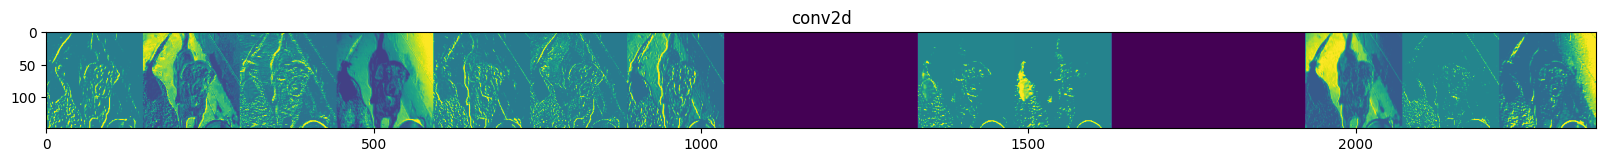

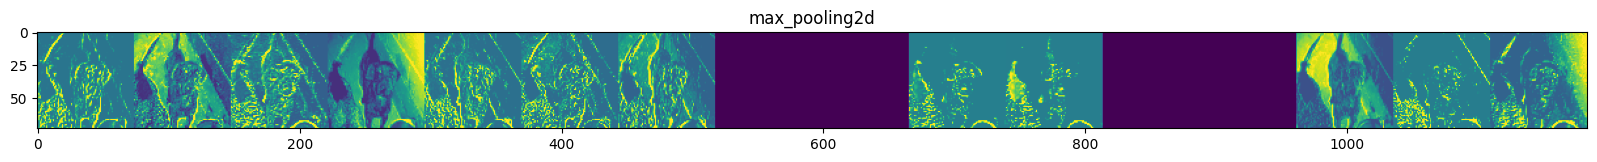

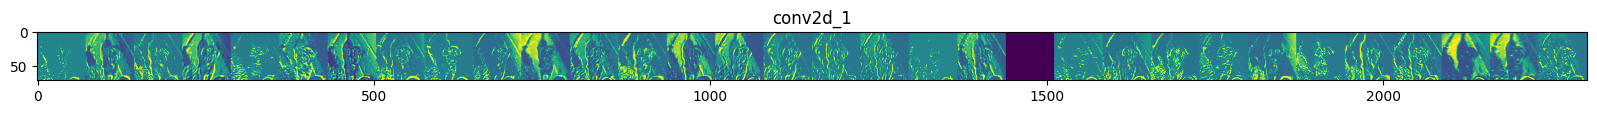

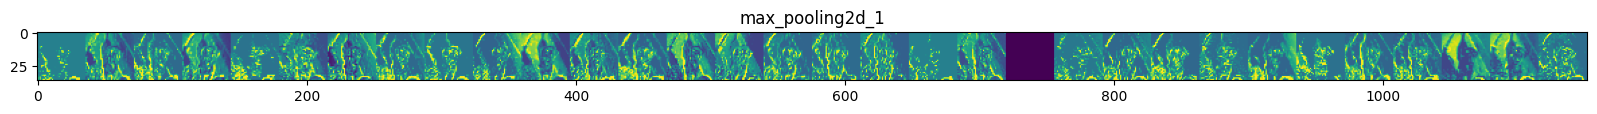

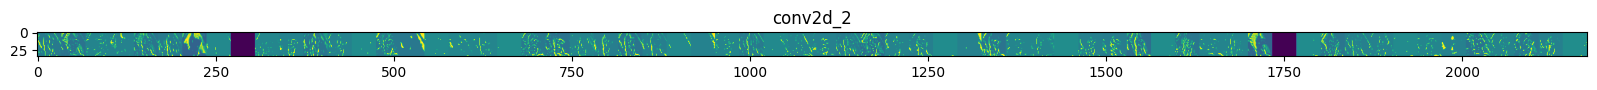

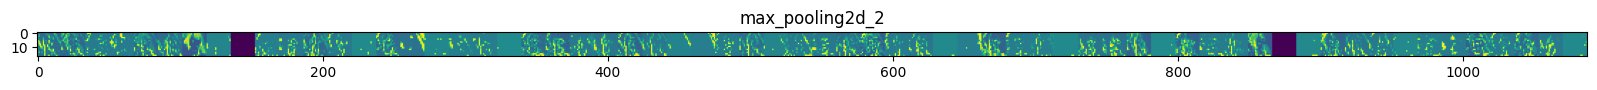

In [17]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

## Analysis of the accuracy and loss

Text(0.5, 1.0, 'Training and validation loss')

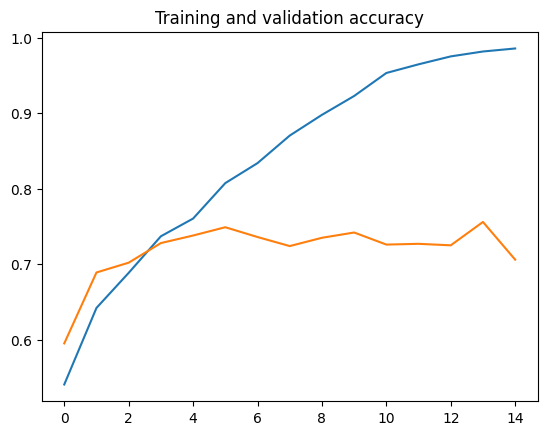

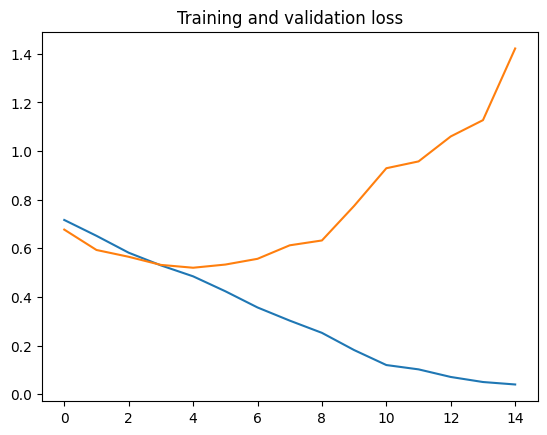

In [18]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

The model is currently overfitting a lot as the validation loss is at its minimum at 4 epochs and it increases after this all the while the training loss decreases steadily to 0.